# Global Power Plant Project


In [161]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


In [163]:
df = pd.read_csv(r'F:\database_IND.csv')



country country_long                                               name  \
0       IND        India                                   ACME Solar Tower   
1       IND        India                                ADITYA CEMENT WORKS   
2       IND        India                           AES Saurashtra Windfarms   
3       IND        India                                        AGARTALA GT   
4       IND        India                                       AKALTARA TPP   
5       IND        India                                       AKRIMOTA LIG   
6       IND        India                                             ALIYAR   
7       IND        India                                    ALLAIN DUHANGAN   
8       IND        India                                        ALMATTI DAM   
9       IND        India                                        AMAR KANTAK   
10      IND        India                                      AMARAVATI TPP   
11      IND        India                             ANANDPUR SAHIB ST-I&II   
12      IND        India                                        ANAPARA "C"   
13      IND        India                                             ANDHRA   
14      IND        India                                  ANOOPGARH ST I&II   
15      IND        India                                             ANPARA   
16      IND        India                                            ANTA GT   
17      IND        India                                            ANUPPUR   
18      IND        India                                         ANUPUR TPP   
19      IND        India                                  ARVINDNAGAR SUGAR   
20      IND        India                                    ASHOKNAGAR MILL   
21      IND        India                                       ATHANI SUGAR   
22      IND        India                                         AURAIYA GT   
23      IND        India                                AVANTHA BHANDAR TPP   
24      IND        India                               AWARPUR CEMENT PLANT   
25      IND        India                                           Abhijeet   
26      IND        India                          Amarsar Solar Power Plant   
27      IND        India                                  Anabura Wind Farm   
28      IND        India                Ananthapur - Meil Solar Power Plant   
29      IND        India                              Andrha Lake Wind Farm   
30      IND        India                               Anikkadavu Wind Farm   
31      IND        India                             Arasinagundi Wind Farm   
32      IND        India                 Askandra - DREPL Solar Power Plant   
33      IND        India  Askandra - Electromech Maritech Solar Power Plant   
34      IND        India              Askandra - Finehope Solar Power Plant   
35      IND        India                 Askandra - Khaya Solar Power Plant   
36      IND        India                Askandra - Newton Solar Power Plant   
37      IND        India               Askandra - Saidham Solar Power Plant   
38      IND        India                Askandra - Vasavi Solar Power Plant   
39      IND        India                                           BADARPUR   
40      IND        India                                       BAGALKOT ICP   
41      IND        India                                       BAGLIHAR HEP   
42      IND        India                                    BAGLIHAR HEP-II   
43      IND        India                                         BAIRA SIUL   
44      IND        India                                          BAKRESWAR   
45      IND        India                                          BALCO TPP   
46      IND        India                                           BALIMELA   
47      IND        India                               BALLARPUR BILT POWER   
48      IND        India                                     BAMANIA CEMENT   
49      IND        India                              

In [164]:

pd.set_option("display.max_column", None)
pd.set_option("display.max_row", None)

In [165]:

df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  other_fuel3  \
0   28.1839    73.2407        Solar         NaN         NaN          NaN   
1   24.7663    74.6090         Coal         NaN         NaN          NaN   
2   21.9038    69.3732         Wind         NaN         NaN          NaN   
3   23.8712    91.3602          Gas         NaN         NaN          NaN   
4   21.9603    82.4091         Coal         Oil         NaN          NaN   

   commissioning_year                 owner  \
0              2011.0           Solar Paces   
1                 NaN  Ultratech Cement ltd   
2                 NaN                   AES   
3              2004.0                   NaN   
4              2015.0                   NaN   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source  wepp_id  year_of_capacity_data  \
0  National Renewable Energy Laboratory      NaN                    NaN   
1                                   WRI      NaN                    NaN   
2                                   WRI      NaN                    NaN   
3                                   WRI      NaN                 2019.0   
4                                   WRI      NaN                 2019.0   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN           617.789264              843.747   
4                  NaN          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           886.004428           663.774500           626.239128   
4          6243.000000          5385.579736          7279.000000   

   generation_gwh_2019         generation_data_source  \
0                  NaN                            NaN   
1                  NaN                            NaN   
2                  NaN                            NaN   
3                  NaN  Central Electricity Authority   
4                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN

In [166]:

df.shape

(907, 27)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [115]:

float_features = df.select_dtypes(include=['object']).columns
print("Total Numbers of float Features: ", float_features.shape[0])

print("float Feature Name: ", float_features.tolist())

Total Numbers of float Features:  12
float Feature Name:  ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'other_fuel2', 'owner', 'source', 'url', 'geolocation_source', 'generation_data_source']


In [116]:

cat_features = df.select_dtypes(include=['float64']).columns
print("Total Numbers of Categorical Features: ", cat_features.shape[0])

print("Categorical Feature Name: ", cat_features.tolist())

Total Numbers of Categorical Features:  15
Categorical Feature Name:  ['capacity_mw', 'latitude', 'longitude', 'other_fuel3', 'commissioning_year', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'estimated_generation_gwh']


In [117]:

null_count = df.isnull().sum()
null_count

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In the above cell we can see that there are missing values in many columns and few even have all the 907 rows empty that will need to be removed since it provides no insights.

In [118]:

null_percent = df.isnull().sum()/df.shape[0]*100
null_percent

country                       0.000000
country_long                  0.000000
name                          0.000000
gppd_idnr                     0.000000
capacity_mw                   0.000000
latitude                      5.071665
longitude                     5.071665
primary_fuel                  0.000000
other_fuel1                  78.169791
other_fuel2                  99.889746
other_fuel3                 100.000000
commissioning_year           41.896362
owner                        62.293275
source                        0.000000
url                           0.000000
geolocation_source            2.094818
wepp_id                     100.000000
year_of_capacity_data        42.778390
generation_gwh_2013         100.000000
generation_gwh_2014          56.119074
generation_gwh_2015          53.472988
generation_gwh_2016          52.149945
generation_gwh_2017          51.488423
generation_gwh_2018          50.606395
generation_gwh_2019         100.000000
generation_data_source   

In [119]:

Mis_value_50_perc = null_percent[null_percent > 50]
Mis_value_50_perc

other_fuel1                  78.169791
other_fuel2                  99.889746
other_fuel3                 100.000000
owner                        62.293275
wepp_id                     100.000000
generation_gwh_2013         100.000000
generation_gwh_2014          56.119074
generation_gwh_2015          53.472988
generation_gwh_2016          52.149945
generation_gwh_2017          51.488423
generation_gwh_2018          50.606395
generation_gwh_2019         100.000000
generation_data_source       50.496141
estimated_generation_gwh    100.000000
dtype: float64

<Axes: >

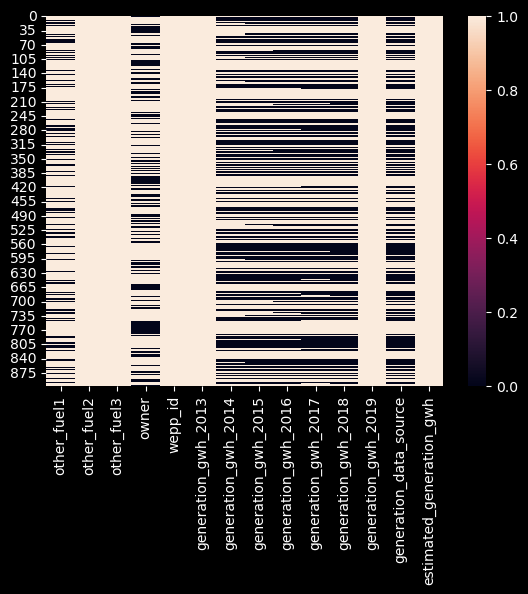

In [120]:
# Heat map 
sns.heatmap(df[Mis_value_50_perc.keys()].isnull())

In [123]:

Mis_value_20_50_perc = null_percent[(null_percent > 20) & (null_percent < 50)]
Mis_value_20_50_perc

commissioning_year       41.896362
year_of_capacity_data    42.778390
dtype: float64

<Axes: >

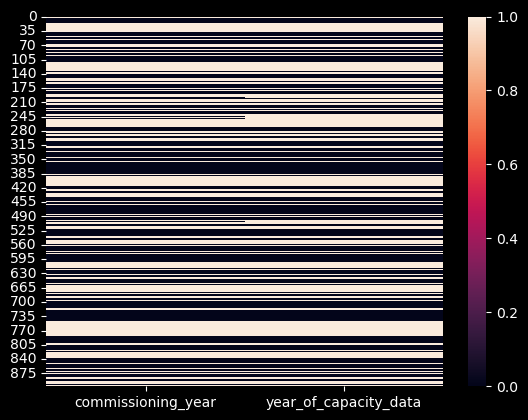

In [124]:

sns.heatmap(df[Mis_value_20_50_perc.keys()].isnull())

In [125]:

Mis_value_5_20_perc = null_percent[(null_percent > 5) & (null_percent < 20)]
Mis_value_5_20_perc

latitude     5.071665
longitude    5.071665
dtype: float64

<Axes: >

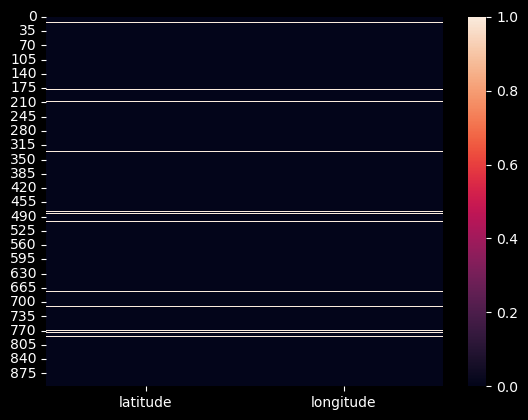

In [126]:

sns.heatmap(df[Mis_value_5_20_perc.keys()].isnull())

In [127]:

df.nunique().to_frame("Unique Value")
df.drop(columns = ['other_fuel2', 'other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019', 'estimated_generation_gwh'], axis = 1, inplace = True)

In [168]:

df.drop(columns = ['other_fuel2', 'other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019', 'estimated_generation_gwh'], axis = 1, inplace = True)

In [135]:
df.shape

(907, 21)

In [136]:
df.describe()


capacity_mw    latitude   longitude  commissioning_year  \
count   907.000000  861.000000  861.000000          527.000000   
mean    326.223755   21.197918   77.464907         1997.091082   
std     590.085456    6.239612    4.939316           17.082868   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.725000   16.773900   74.256200         1988.000000   
50%      59.200000   21.780000   76.719500         2001.000000   
75%     385.250000   25.512400   79.440800         2012.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       year_of_capacity_data  generation_gwh_2014  generation_gwh_2015  \
count                  519.0           398.000000           422.000000   
mean                  2019.0          2431.823590          2428.226946   
std                      0.0          4026.440035          4194.596959   
min                   2019.0             0.000000             0.000000   
25%                   2019.0           223.557672           176.381063   
50%                   2019.0           801.123775           711.181225   
75%                   2019.0          3035.306250          3084.121250   
max                   2019.0         28127.000000         30539.000000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
count           434.000000           440.000000           448.000000  
mean           2467.936859          2547.759305          2600.804099  
std            4162.884308          4196.991169          4314.880456  
min               0.000000             0.000000             0.000000  
25%             188.285252           177.874930           193.378250  
50%             737.205450           817.977250           751.644375  
75%            3282.861313          3275.690475          3143.535900  
max           30015.000000         35116.000000         35136.000000

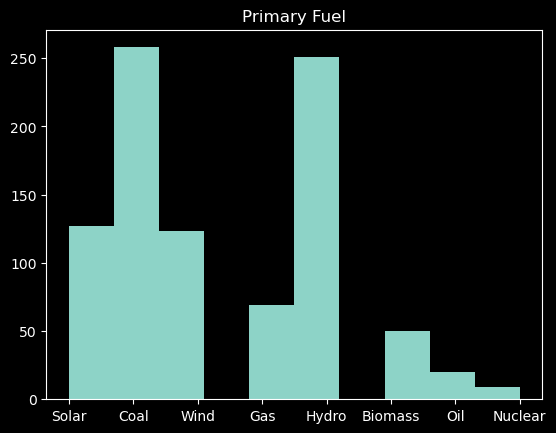

In [137]:


df['primary_fuel'].hist(grid = False)
plt.title('Primary Fuel')
plt.show()

- The representation of the column primary fuel as it is one the target variable
- There is class imbalance in this data
- Very high skewness in the column capacity_mw

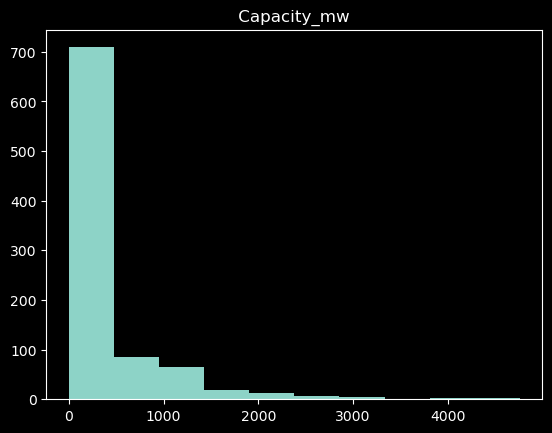

In [138]:


df['capacity_mw'].hist(grid = False)
plt.title(' Capacity_mw ')
plt.show()

The visual representation of the capacity_mw column, there is high skewness



array([[<Axes: title={'center': 'capacity_mw'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'commissioning_year'}>,
        <Axes: title={'center': 'year_of_capacity_data'}>,
        <Axes: title={'center': 'generation_gwh_2014'}>],
       [<Axes: title={'center': 'generation_gwh_2015'}>,
        <Axes: title={'center': 'generation_gwh_2016'}>,
        <Axes: title={'center': 'generation_gwh_2017'}>],
       [<Axes: title={'center': 'generation_gwh_2018'}>, <Axes: >,
        <Axes: >]], dtype=object)

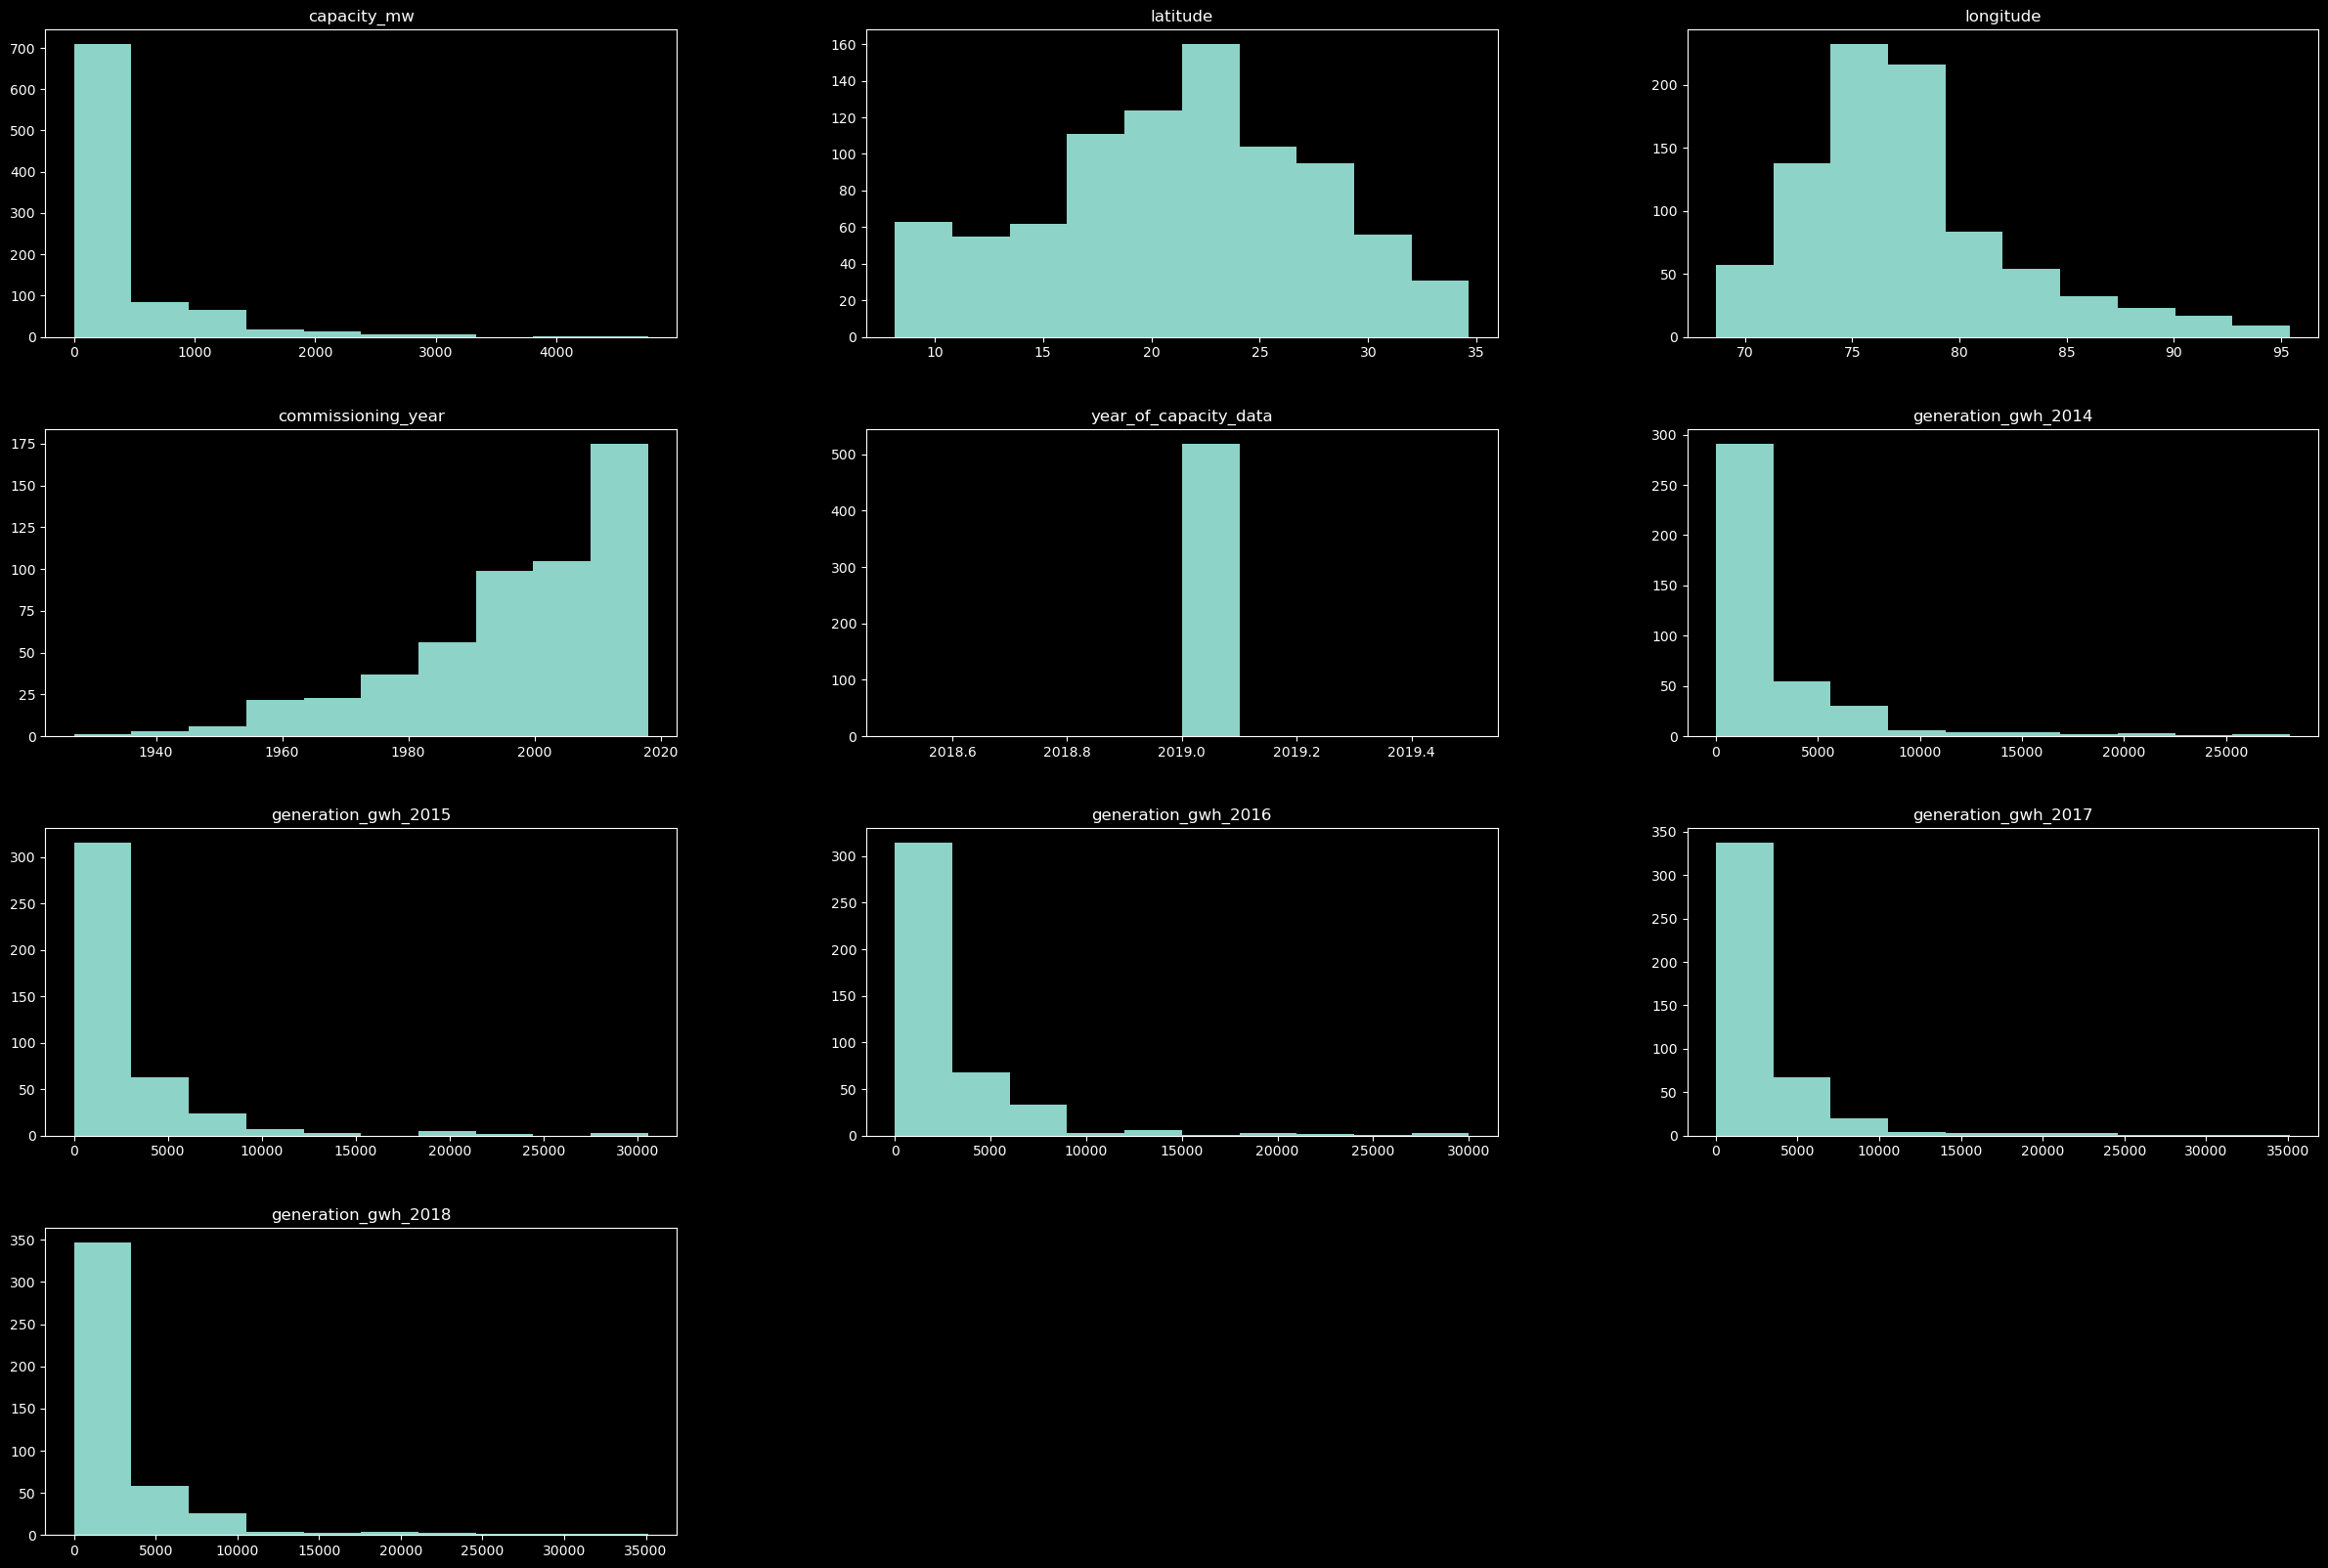

In [133]:
# The data is now less skewed and more towards normal distribution.
df.hist(figsize = (30,20), grid = False)

<Axes: >

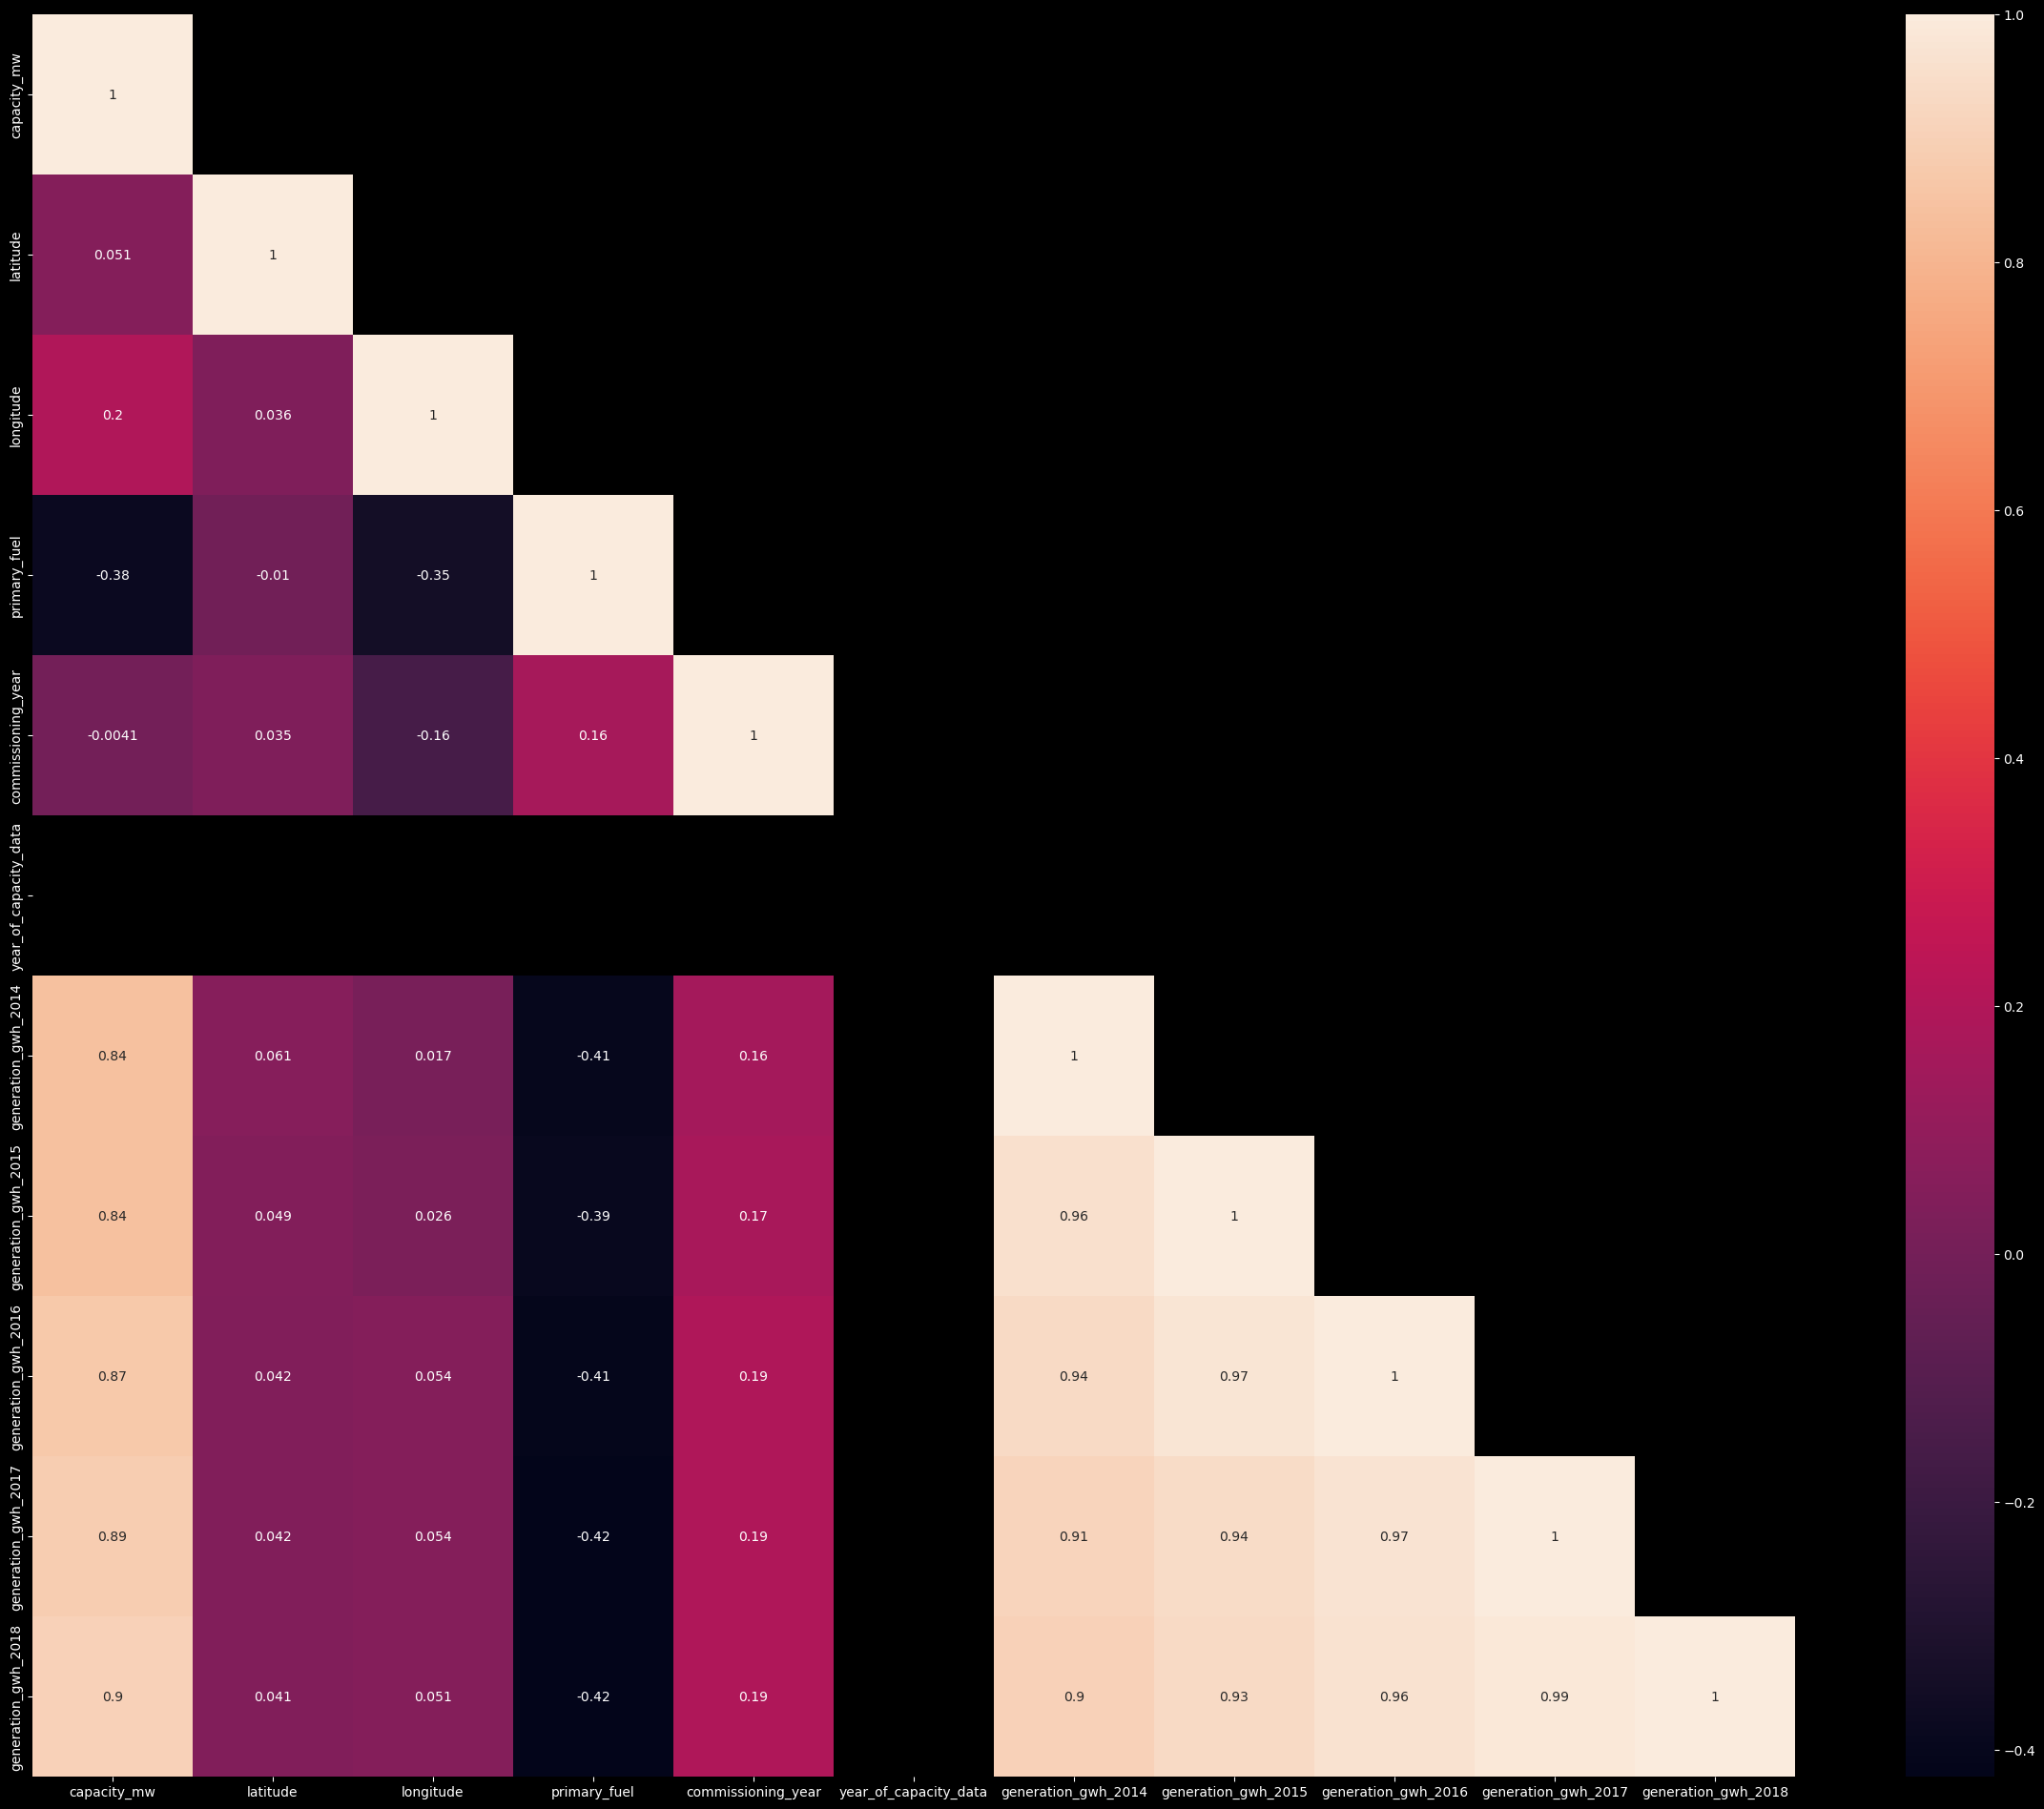

In [65]:
#Correlation Matrix
corr_mat = df.corr()
m = np.array(corr_mat)
m[np.tril_indices_from(m)] = False

fig = plt.gcf()
fig.set_size_inches(30,24)
sns.heatmap(data = corr_mat, mask = m, square = True, annot = True, cbar = True)

- It appears that there is high multicollinearity between certain columns.

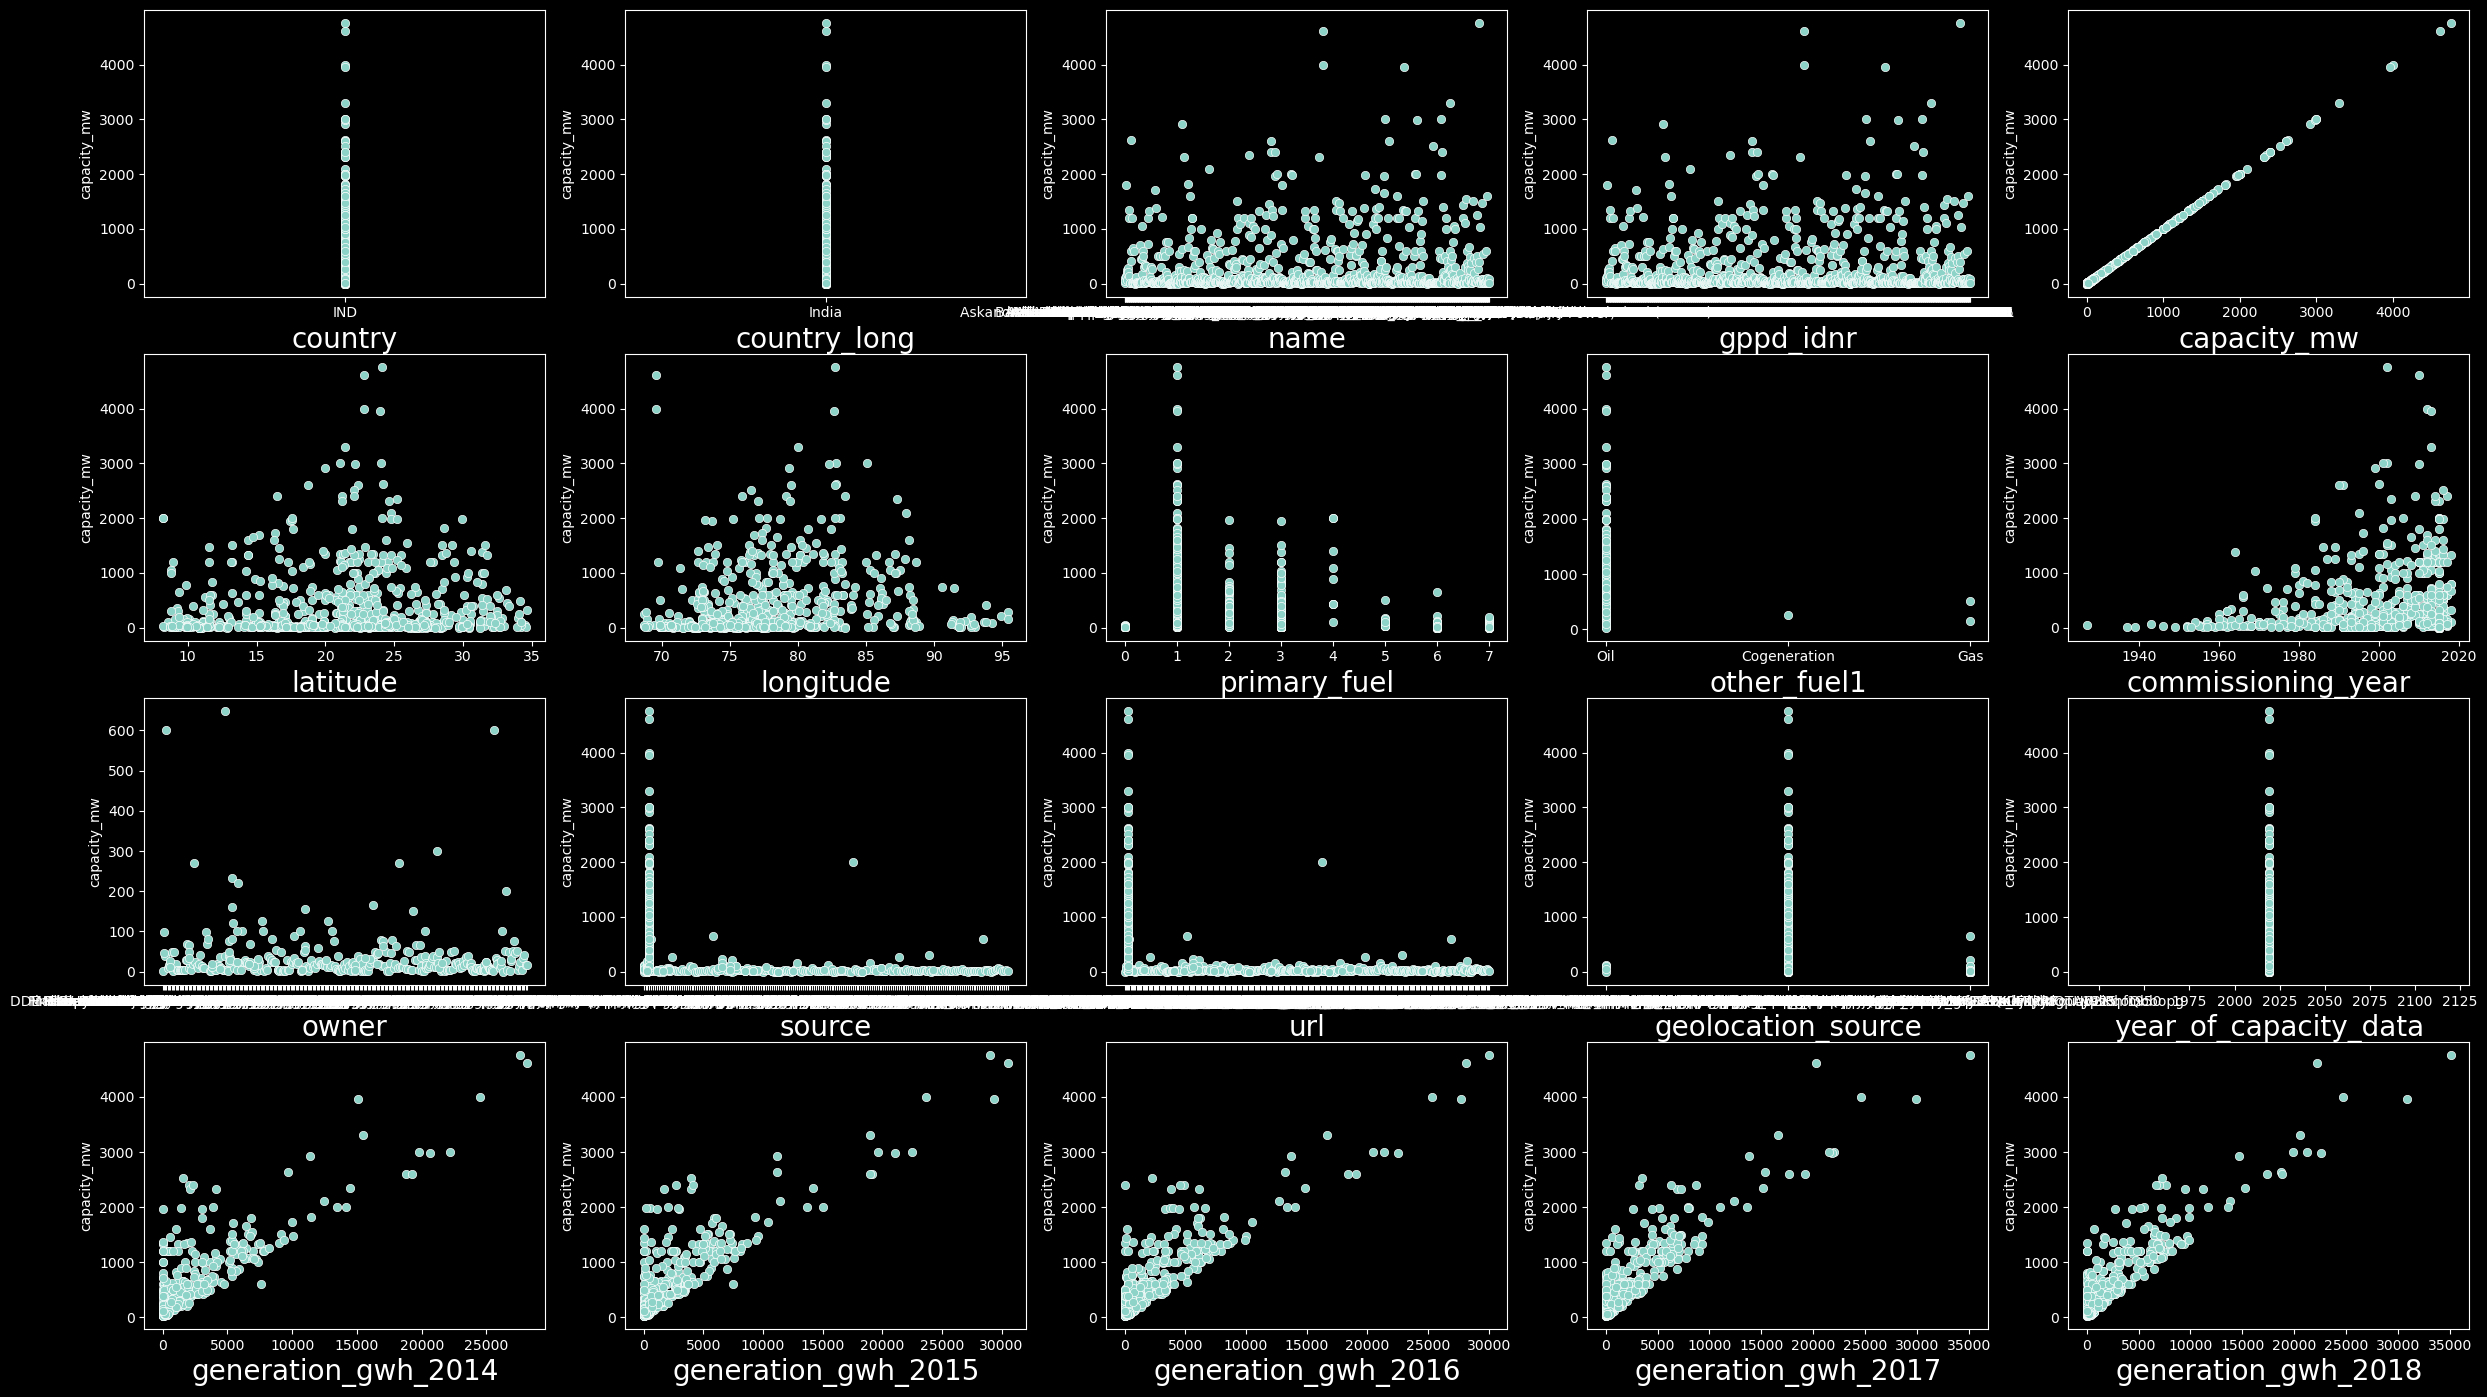

In [68]:

plt.figure(figsize = (30,35))
graph = 1

for column in df:
  if graph<=40:
    ax = plt.subplot(8,5,graph)
    sns.scatterplot(x = df[column], y = 'capacity_mw', data = df)
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

Scatter plot shows that there does not exist relationship between capacity_mw and some variables. We will drop those variables



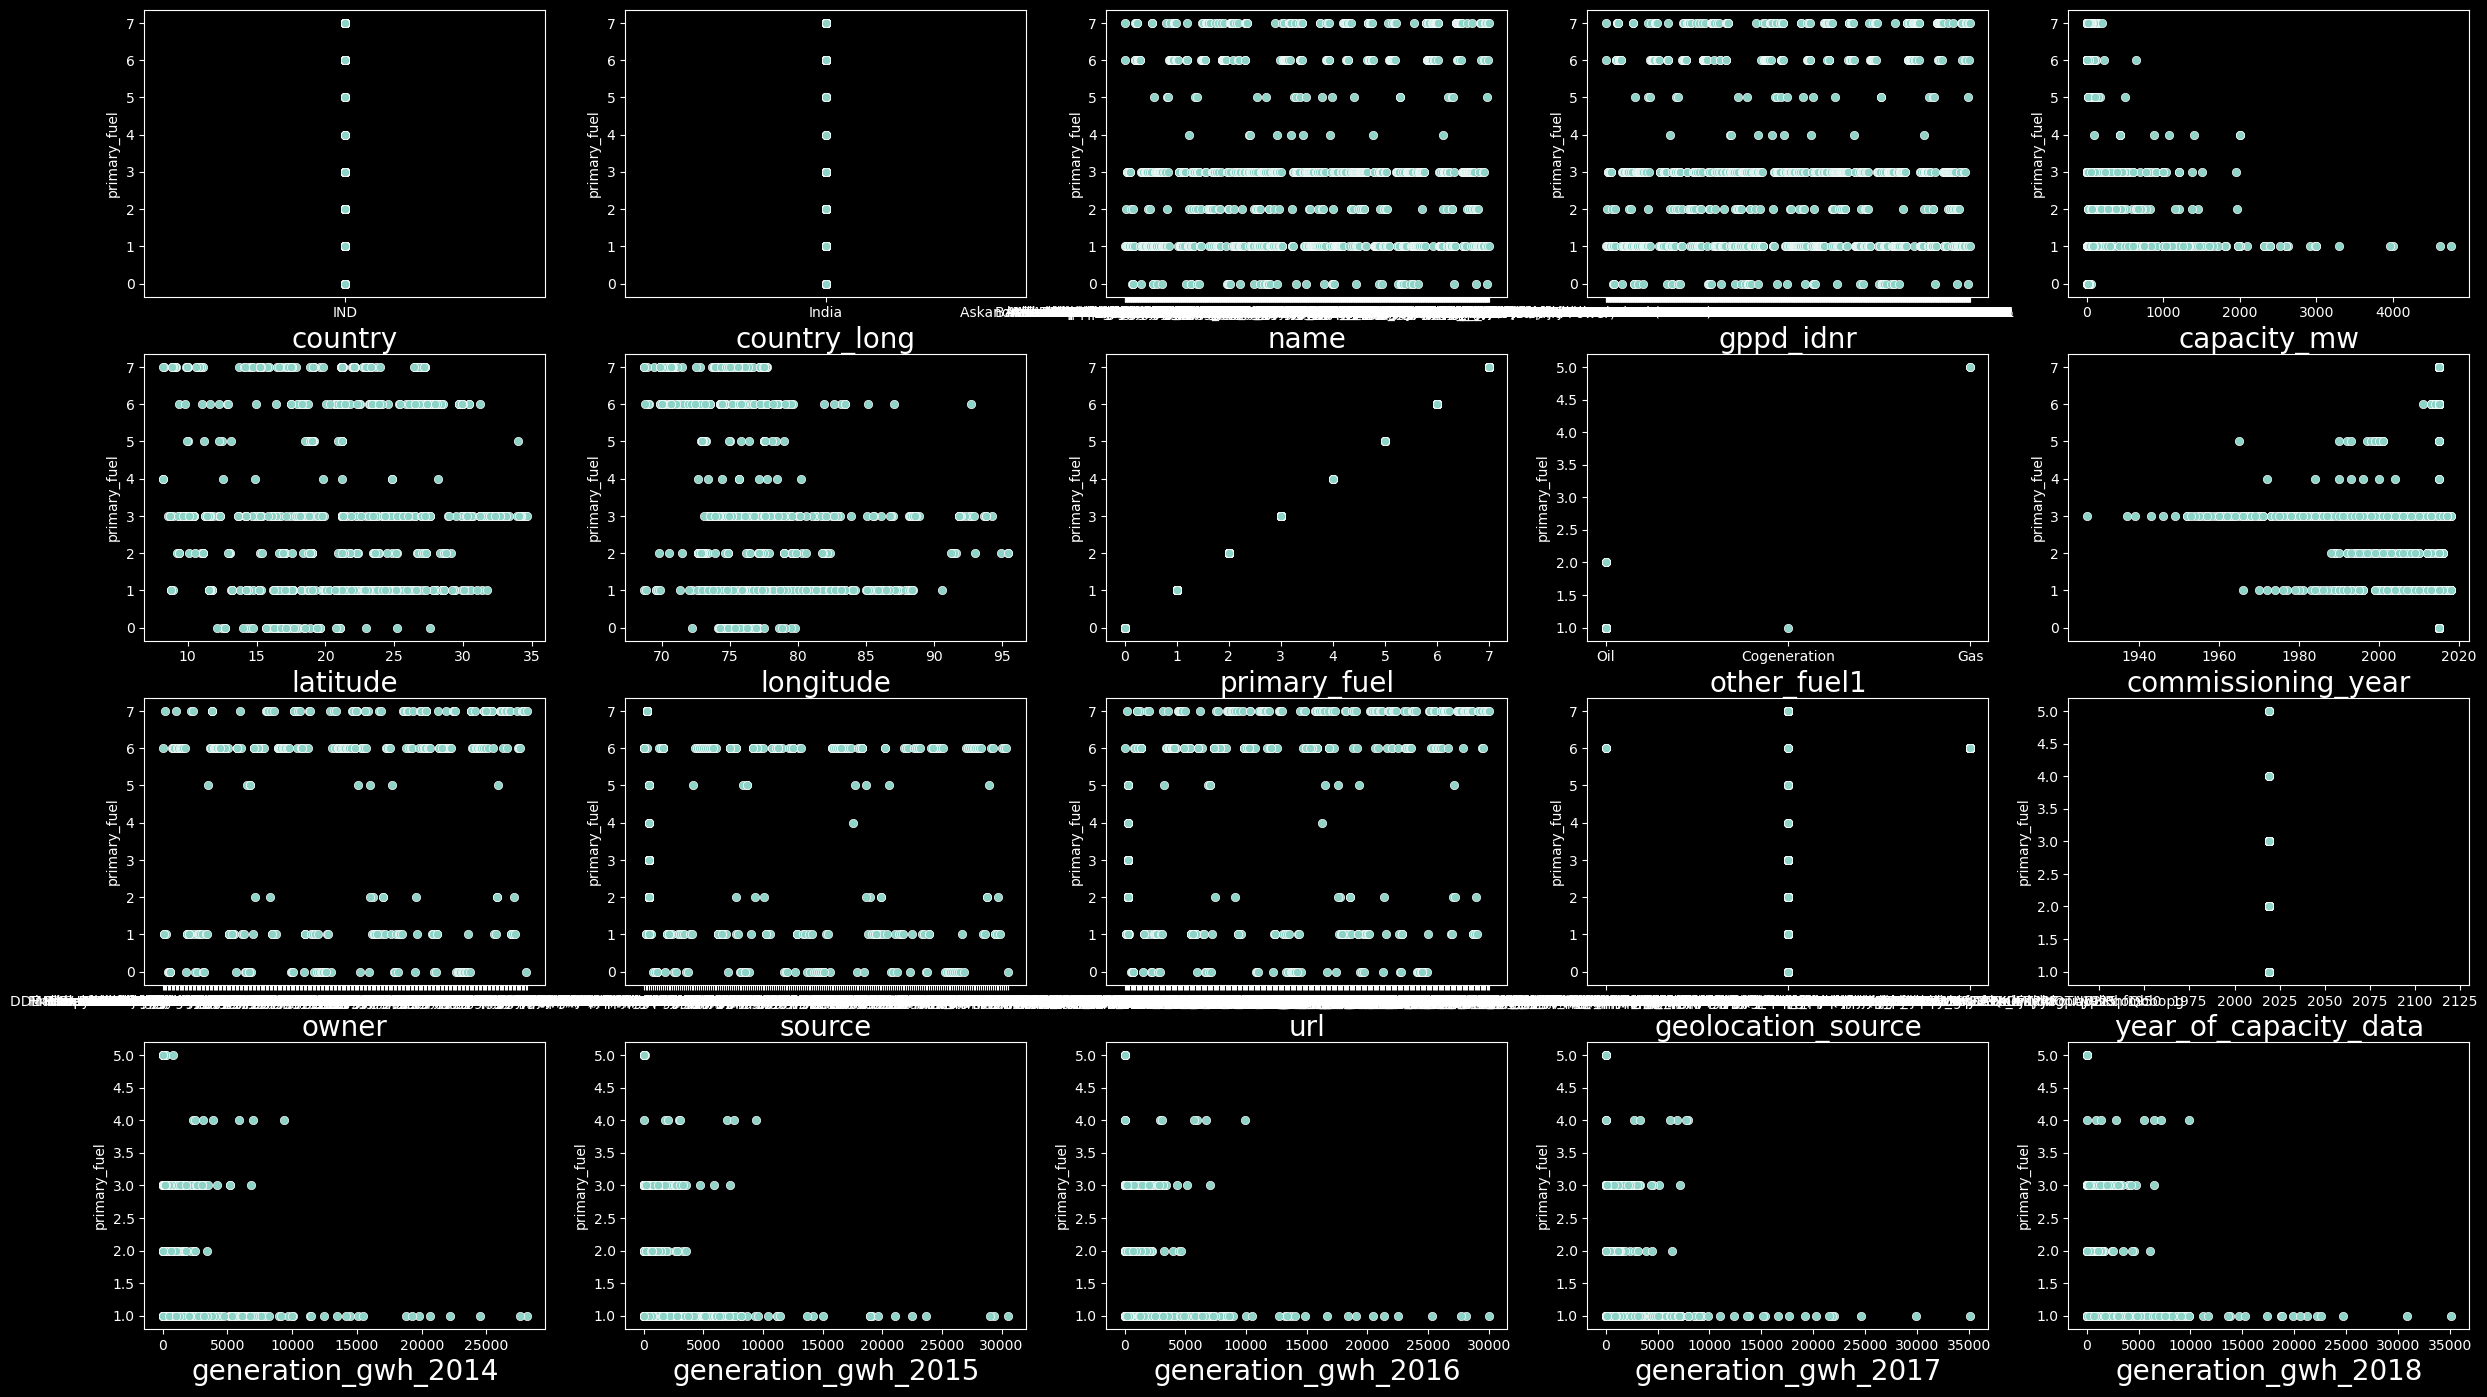

In [69]:

plt.figure(figsize = (30,35))
graph = 1

for column in df:
  if graph<=40:
    ax = plt.subplot(8,5,graph)
    sns.scatterplot(x = df[column], y = 'primary_fuel', data = df)
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

Some variable do not have any relationship with primary_fuel



In [87]:
df.skew()

capacity_mw              3.123576
latitude                -0.149698
longitude                1.141881
primary_fuel             0.472251
commissioning_year      -1.714873
year_of_capacity_data    0.000000
generation_gwh_2014      3.342707
generation_gwh_2015      3.665904
generation_gwh_2016      3.512370
generation_gwh_2017      3.566070
generation_gwh_2018      3.476298
dtype: float64

There is high skewness in some variables



<Axes: xlabel='primary_fuel', ylabel='capacity_mw'>

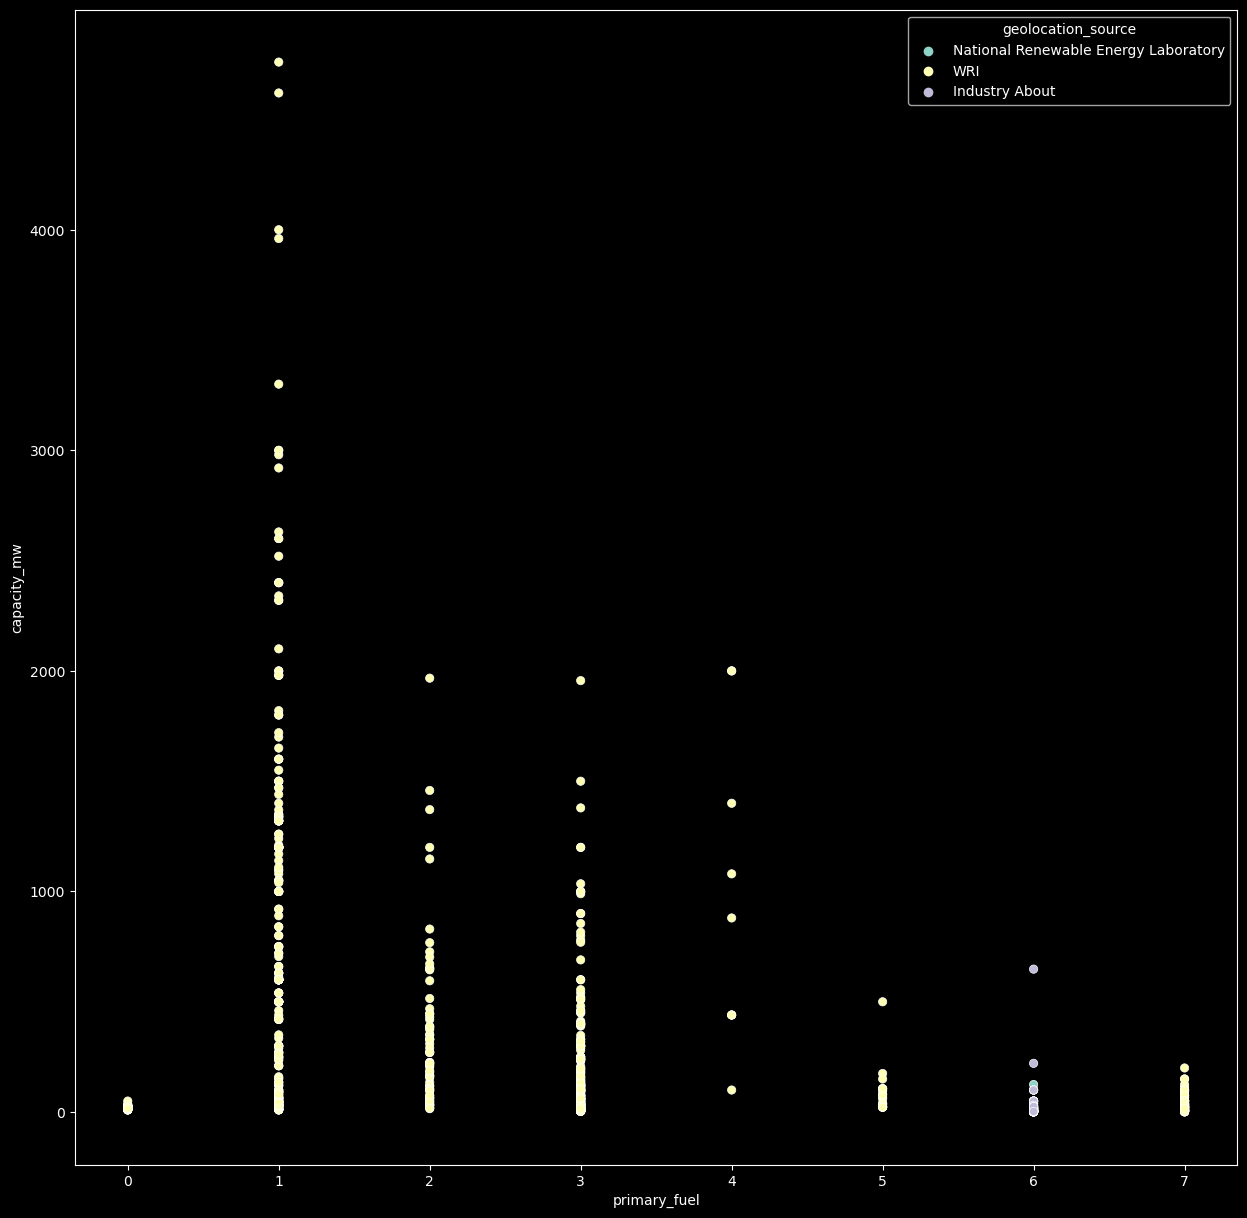

In [88]:
fig,axes=plt.subplots(1,1,figsize=(15,15))
sns.scatterplot(x='primary_fuel',y='capacity_mw',hue='geolocation_source',data=df)

The scatter plot shows the relationship between capacity_mw and primary_level



In [140]:
df['generation_data_source'].value_counts()


Central Electricity Authority    449
Name: generation_data_source, dtype: int64

There is only a single entry in generation_data_source. It will not help in prediction, so it is better to drop it.



In [141]:

df.drop(columns = ['generation_data_source'], axis = 1, inplace = True)


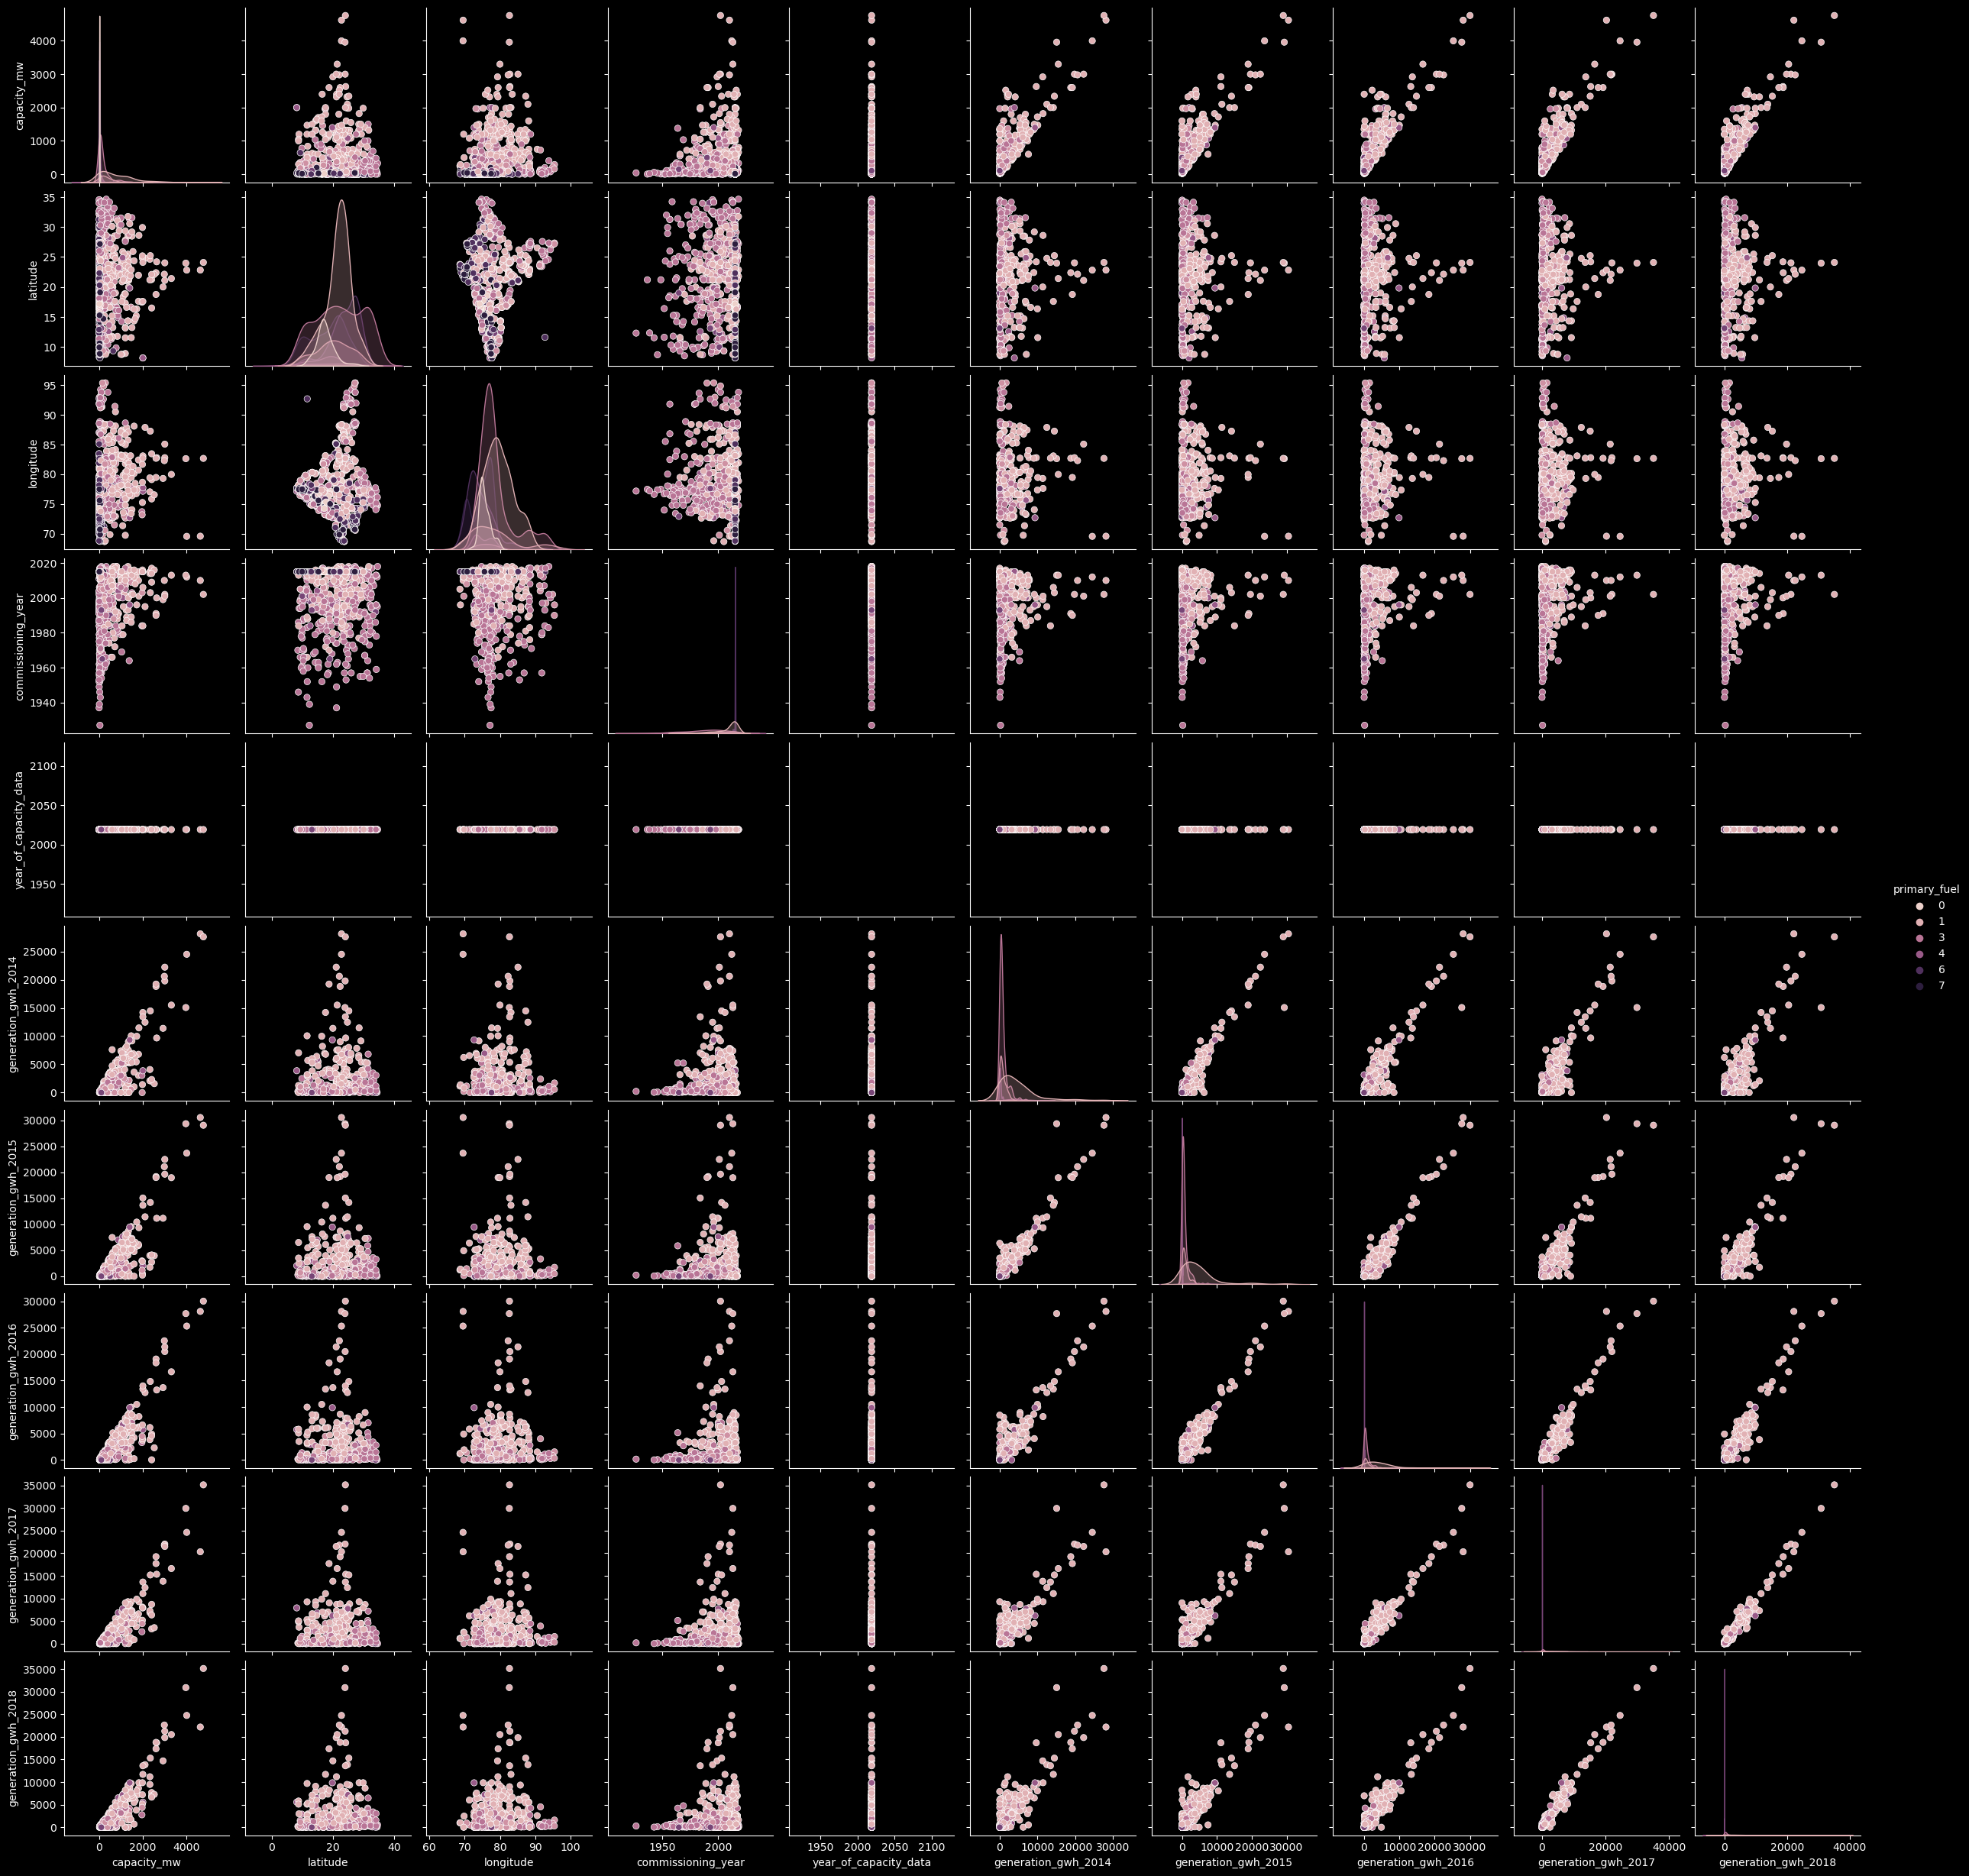

In [92]:
sns.pairplot(df, hue = 'primary_fuel')


Pairplot shows that coal is associated with the high capacity.



In [93]:


from sklearn.impute import KNNImputer
knn_ipm = KNNImputer(n_neighbors = 3)
data_filled = knn_ipm.fit_transform(df[['latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016','generation_gwh_2017', 'generation_gwh_2018']])

data1 = pd.DataFrame(data_filled)

Dealt with null values using KNNImputer



In [142]:

df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)

# filling missing data for categorical values with mode
df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

Since we had to take care of the missing data I have chosen to fill the null values in continous data column with it's mean and the null values for categorical data column with it's mode information.



In [143]:
df['country'].value_counts()

IND    907
Name: country, dtype: int64

- There is a single country, so it is better to drop it



In [80]:
df['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

- There is a single country long, so it is better to drop it



In [81]:
df['name'].value_counts().sum()


907

- There are different names for each row, so it is better to drop it



In [ ]:
df['gppd_idnr'].value_counts().sum()


In [146]:

df.drop(columns = ['gppd_idnr','name', 'country_long','country'], axis = 1, inplace = True)

In [150]:

col = df.drop(columns = ['primary_fuel','other_fuel1','owner','source','url','geolocation_source'])
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1
#REMOVING OUTLIERS
data_new = col[~((col < (Q1 -  1.5*IQR)) |(col > (Q3 +  1.5*IQR))).any(axis=1)]
print("shape before and after")
print("shape before".ljust(20),":", col.shape)
print("shape after".ljust(20),":", data_new.shape)
print("Percentage Loss".ljust(20),":", (col.shape[0]-data_new.shape[0])/col.shape[0])

shape before and after
shape before         : (907, 10)
shape after          : (692, 10)
Percentage Loss      : 0.237045203969129


- We can't apply this method, as we are losing 22% data



In [ ]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

- Applies label encoder



In [ ]:
a = lab_enc.fit_transform(df['primary_fuel'])
b = lab_enc.fit_transform(df['other_fuel1'])
c = lab_enc.fit_transform(df['owner'])
d = lab_enc.fit_transform(df['source'])
e = lab_enc.fit_transform(df['url'])
f = lab_enc.fit_transform(df['geolocation_source'])

- Fitted the data



In [ ]:
df['primary_fuel'] = a
df['other_fuel1'] = b
df['owner'] = c
df['source'] = d
df['url'] = e 
df['geolocation_source'] = f
df

- Substituted the value and reading the data



In [ ]:
df.hist(figsize = (30,20), grid = False)


- The data is now less skewed



In [ ]:
plt.style.use('bmh')
g = sns.pairplot(df)
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

- From the above pair plot we can see the data distribution amongst the numerical data type columns.



# Model with Target Variable: primary_fuel



In [ ]:
# Splitting the data
y1 = df['primary_fuel']
x1 = df.drop(['primary_fuel'],axis = 1)

Dealing with the problem of class imbalance




In [45]:
# Dealing with the problem of class imbalance
le = LabelEncoder()
df["primary_fuel"] = le.fit_transform(df["primary_fuel"])
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude  primary_fuel other_fuel1  commissioning_year  \
0   28.1839    73.2407             6         NaN              2011.0   
1   24.7663    74.6090             1         NaN              2015.0   
2   21.9038    69.3732             7         NaN              2015.0   
3   23.8712    91.3602             2         NaN              2004.0   
4   21.9603    82.4091             1         Oil              2015.0   

                  owner                                source  \
0           Solar Paces  National Renewable Energy Laboratory   
1  Ultratech Cement ltd                  Ultratech Cement ltd   
2                   AES                                   CDM   
3                   NaN         Central Electricity Authority   
4                   NaN         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source  year_of_capacity_data  \
0  National Renewable Energy Laboratory                    NaN   
1                                   WRI                    NaN   
2                                   WRI                    NaN   
3                                   WRI                 2019.0   
4                                   WRI                 2019.0   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           617.789264              843.747           886.004428   
4          3035.550000             5916.370          6243.000000   

   generation_gwh_2017  generation_gwh_2018  
0                  NaN                  NaN  
1                  NaN                  NaN  
2                  NaN                  NaN  
3           663.774500           626.239128  
4          5385.579736          7279.000000

- I am using Label Encoder on our target column "primary_fuel" since we want our labels to be converted from the object datatype to numerical datatype.



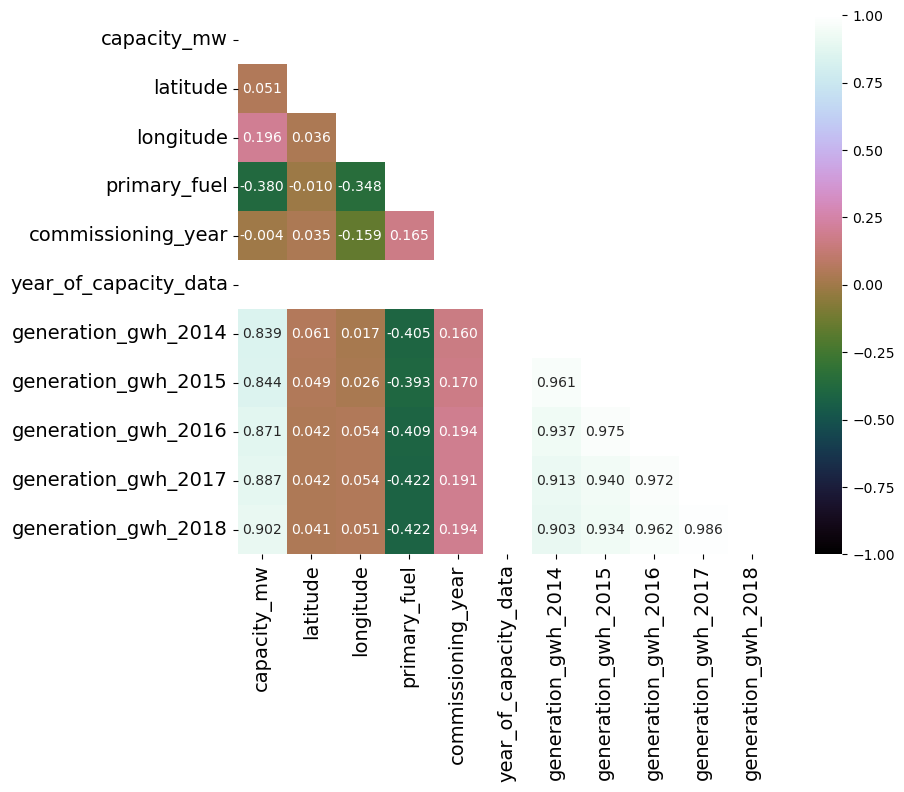

In [46]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- In the above heatmap we can see that our target labels "capacity_mw" and "primary_fuel" has both positive and negative correlations with the remaining feature columns. Also we see very less or negligible amount of multi colinearity so we will not have to worry about it. Since the one's which are reflecting the value are inter dependent on those feature columns and I intend to retain and keep them.

# Correlation Bar Plot comparing features with our labels


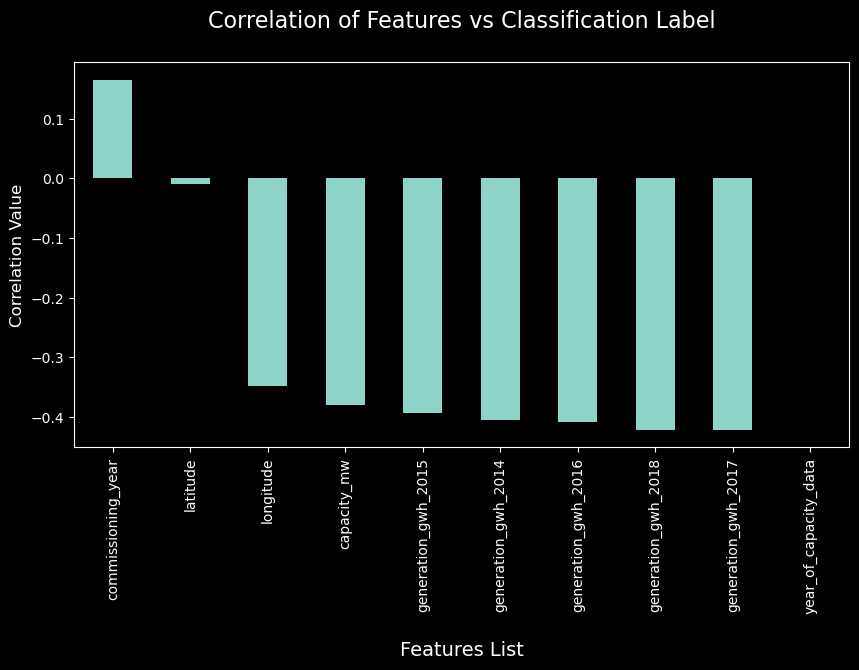

In [47]:
plt.style.use('dark_background')
data_corr = df.corr()
plt.figure(figsize=(10,5))
data_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

- When we consider our classification label "primary_fuel" then we can see the remaining columns that are the features have 2 of them with positive correlation and 4 of them with neagtive correlation.

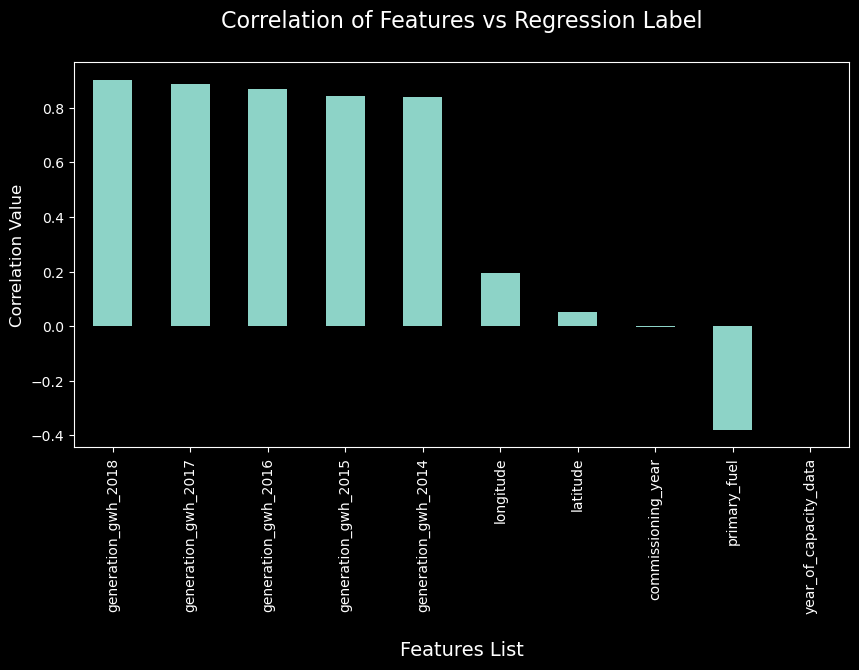

In [48]:
data_corr = df.corr()
plt.figure(figsize=(10,5))
data_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Regression Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

- When we consider our regression label "capacity_mw" then we can see the remaining columns that are the features have 4 of them with positive correlation and 2 of them with neagtive correlation.

skewness


In [49]:
X = df.drop('primary_fuel', axis=1)
Y = df['primary_fuel']

In [50]:
Y.value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

 Feature Scaling


In [51]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=45)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)